In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/original-data/test_text
/kaggle/input/original-data/training_text
/kaggle/input/original-data/test_variants
/kaggle/input/original-data/training_variants


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_text = pd.read_csv("/kaggle/input/original-data/training_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
train_variants = pd.read_csv("/kaggle/input/original-data/training_variants")

In [4]:
test_text = pd.read_csv("/kaggle/input/original-data/test_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
test_variants = pd.read_csv("/kaggle/input/original-data/test_variants")

In [5]:
print("Train and Test variants shape : ",train_variants.shape, test_variants.shape)
print("Train and Test text shape : ",train_text.shape, test_text.shape)

Train and Test variants shape :  (3321, 4) (5668, 3)
Train and Test text shape :  (3321, 2) (5668, 2)


In [6]:
train_text.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [7]:
train_variants.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [8]:
train_variants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3321 non-null   int64 
 1   Gene       3321 non-null   object
 2   Variation  3321 non-null   object
 3   Class      3321 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [9]:
train_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3321 non-null   int64 
 1   Text    3316 non-null   object
dtypes: int64(1), object(1)
memory usage: 52.0+ KB


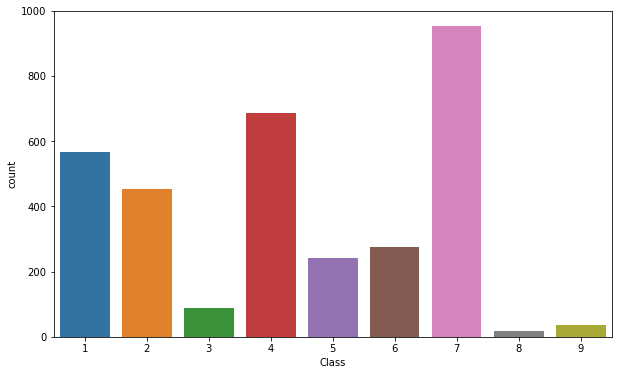

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x="Class", data=train_variants)

*It can be observed from the above figure that class 7 has the maximum information corresponding to it.*

In [12]:
train_variants['Gene'].value_counts()

BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
         ... 
WHSC1       1
CTLA4       1
RAD51D      1
FAM58A      1
PPM1D       1
Name: Gene, Length: 264, dtype: int64

In [13]:
train_variants['Variation'].value_counts()

Truncating Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
                        ..
S2215T                   1
D83V                     1
A1200V                   1
T790M                    1
S37A                     1
Name: Variation, Length: 2996, dtype: int64

In [11]:
#merging both gene_variations and text data based on ID
train_data = pd.merge(train_variants, train_text,on='ID', how='left')
train_data.head()